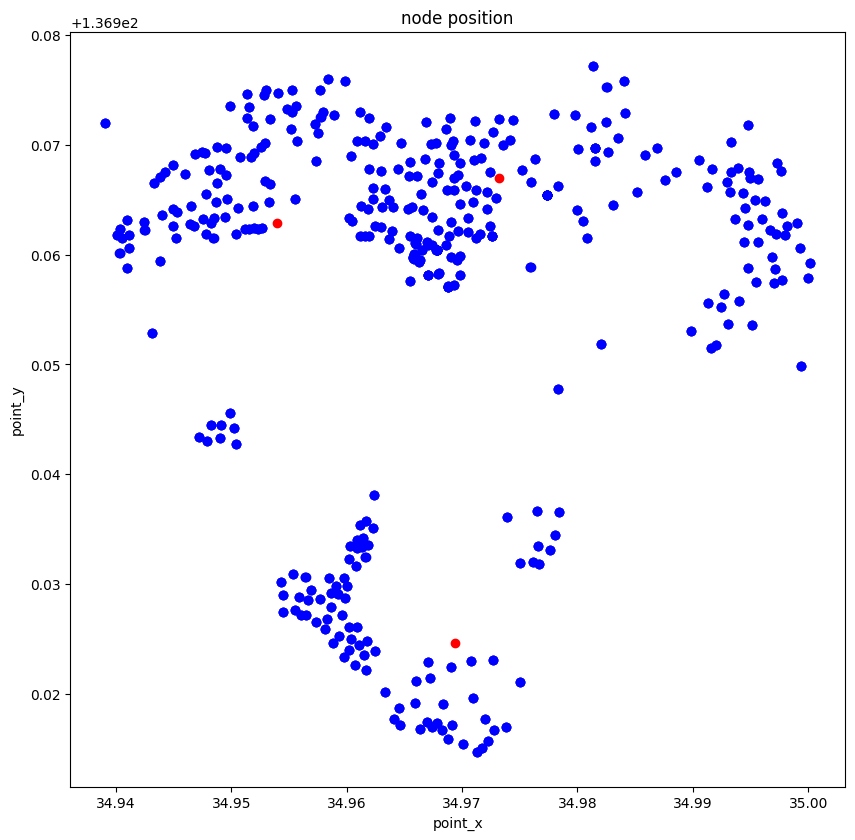

In [85]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy

@dataclasses.dataclass
class GarbageStation:
    name: str
    latitude: float
    longitude: float
    burnable: bool
    incombustible: bool
    resource: bool

@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float
        
csv_file = "/Users/tozastation/workspace/ns-3.30/scratch/garbage_station.csv"
garbage_stations = []
garbage_stations_csv = pd.read_csv(csv_file)

for index, row in garbage_stations_csv.iterrows():
    is_burnable = False if row["もえるゴミ"] == None else True
    is_incombustible = False if row["もえないゴミ"] == None else True
    is_resource = False if row["資源ごみ"] == None else True
    
    gs = GarbageStation(
        row["ID"], 
        round(float(row["緯度"]), 6), 
        round(float(row["経度"]), 6),
        is_burnable,
        is_incombustible,
        is_resource
    )
    
    if gs.burnable:
        garbage_stations.append(gs)
    if gs.incombustible:
        new = copy.copy(gs)
        new.latitude = round(new.latitude + 0.000001, 6)
        garbage_stations.append(new)
    if gs.resource:
        new = copy.copy(gs)
        new.latitude = round(new.latitude + 0.000002, 6)
        garbage_stations.append(new)


fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)
ax.set_title("node position")
ax.set_xlabel("point_x")
ax.set_ylabel("point_y")

# plot Node
for garbage_station in garbage_stations:
    latitude = garbage_station.latitude
    longitude = garbage_station.longitude
    ax.scatter(latitude, longitude, color='blue')

# plot Gateway
gw_a = LoRaWANGateway(34.969392, 136.924615)
gw_b = LoRaWANGateway(34.953981, 136.962864)
gw_c = LoRaWANGateway(34.973183, 136.967018)
ax.scatter(gw_a.latitude, gw_a.longitude, color='red')
ax.scatter(gw_b.latitude, gw_b.longitude, color='red')
ax.scatter(gw_c.latitude, gw_c.longitude, color='red')

fig.savefig("/Users/tozastation/workspace/ns-3.30/scratch/node_position.png")
# plt.show()
# plt.close() 

In [26]:
df1

,地方公共団体コード,ID,名称,地区名,緯度,経度,ゴミカレンダー区分,もえるゴミ,もえないゴミ,資源ごみ
0,234427,GS001,森岡1,森岡,34.993933,136.967872,森岡地区,NaN,○,○
1,234427,GS002,森岡2,森岡,34.993315,136.967541,森岡地区,○,○,○
2,234427,GS003,森岡5,森岡,34.994744,136.971769,森岡地区,○,○,○
3,234427,GS004,森岡7,森岡,34.997634,136.967603,森岡地区,○,○,○
4,234427,GS005,森岡8,森岡,34.994912,136.967521,森岡地区,○,○,○
...,...,...,...,...,...,...,...,...,...,...
376,234427,GS377,藤江53,藤江,34.940918,136.963178,藤江地区,○,○,○
377,234427,GS378,藤江54,藤江,34.942432,136.962988,藤江地区,○,NaN,NaN
378,234427,GS379,藤江55,藤江,34.942467,136.962276,藤江地区,○,NaN,NaN
379,234427,GS380,藤江57,藤江,34.943958,136.963645,藤江地区,○,NaN,NaN
